<a href="https://colab.research.google.com/github/prpfr3/gis_raster_tiff_processing_colabs/blob/main/gis_raster_tiff_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# gis_raster_tiff_processing.py

Attribution:- https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-raster-data/

In [ ]:
!pip freeze

In [ ]:
# Add gis packages to colab environment 
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree
!pip install rasterio
!pip install earthpy

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Lidar Colorado Flood Data

In [3]:
# Get data and set working directory
et.data.get_data("colorado-flood")
working_directory = os.path.join(et.io.HOME, 'earth-analytics', 'data')
print(working_directory)
os.chdir(working_directory)

/root/earth-analytics/data


In [4]:
# Create a path to the pre-flood file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")
lidar_dtm_path

'colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif'

Reading the Raster Data
Raster data can be read using the Python package rasterio


In [5]:
# Open and read in the digital terrain model, built from elevation data gathered via lidar (Light detection and Ranging)
# Note that rio is the alias for rasterio
# masked=True masks all nodata values in the array so they are not plotted or used by Python

with rio.open(lidar_dtm_path) as src:
    lidar_dtm = src.read(1, masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

In [6]:
type(lidar_dtm)

numpy.ma.core.MaskedArray

In [7]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

1676.21 2087.43


In [8]:
# View the dimensions of the array (rows, columns)
lidar_dtm.shape

(2000, 4000)

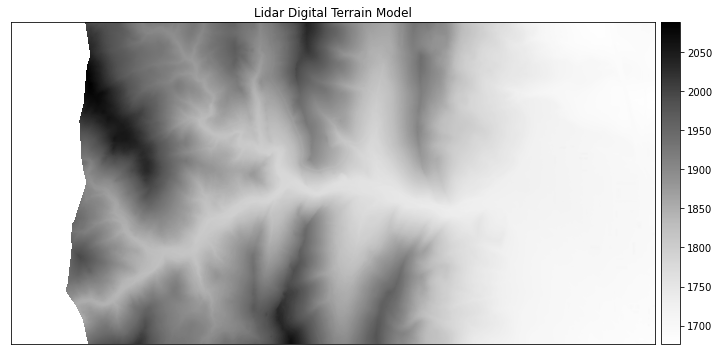

In [9]:
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='Greys',
              title="Lidar Digital Terrain Model")
plt.show()

In [10]:
# Create a path to the post-flood file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "post-flood",
                              "lidar",
                              "post_DTM.tif")
lidar_dtm_path

'colorado-flood/spatial/boulder-leehill-rd/post-flood/lidar/post_DTM.tif'

In [11]:
# Open and read in the digital terrain model, built from elevation data gathered via lidar (Light detection and Ranging)
# Note that rio is the alias for rasterio
# masked=True masks all nodata values in the array so they are not plotted or used by Python

with rio.open(lidar_dtm_path) as src:
    lidar_dtm = src.read(1, masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm

masked_array(
  data=[[2020.22998046875, 2019.419921875, 2018.8099365234375, ...,
         1695.5799560546875, 1695.5299072265625, 1695.5299072265625],
        [2019.989990234375, 2019.22998046875, 2018.5499267578125, ...,
         1695.659912109375, 1695.52001953125, 1695.5699462890625],
        [2019.8299560546875, 2019.0599365234375, 2018.3900146484375, ...,
         1695.52001953125, 1695.429931640625, 1695.489990234375],
        ...,
        [1911.739990234375, 1911.5699462890625, 1911.409912109375, ...,
         1682.8699951171875, 1682.8099365234375, 1682.8099365234375],
        [1911.3199462890625, 1911.169921875, 1911.0599365234375, ...,
         1682.39990234375, 1682.5499267578125, 1682.6300048828125],
        [1910.919921875, 1910.72998046875, 1910.6400146484375, ...,
         1682.18994140625, 1682.2799072265625, 1682.3499755859375]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, Fal

In [12]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

1675.71 2111.96


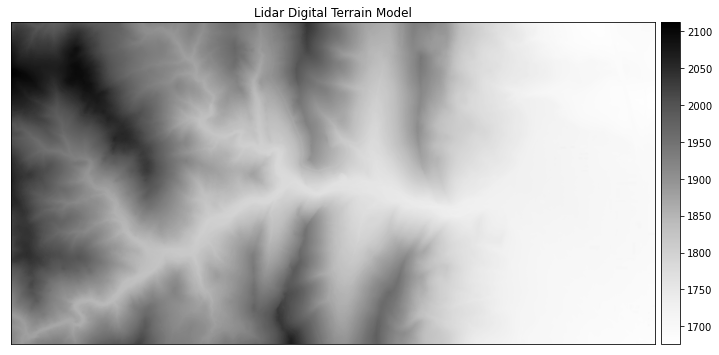

In [13]:
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='Greys',
              title="Lidar Digital Terrain Model")
plt.show()

# Imagery Data Example: USDA NAIP Data

In [14]:
# Download NAIP data
et.data.get_data(url="https://ndownloader.figshare.com/files/23070791")

Extracted output to /root/earth-analytics/data/earthpy-downloads/naip-before-after


'/root/earth-analytics/data/earthpy-downloads/naip-before-after'

In [15]:
# Create a path for the data file - notice it is a .tif file
naip_pre_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "pre-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20150919_crop.tif")

naip_pre_fire_path

'earthpy-downloads/naip-before-after/pre-fire/crop/m_3910505_nw_13_1_20150919_crop.tif'

In [16]:
# Open the data using rasterio
with rio.open(naip_pre_fire_path) as naip_prefire_src:
    naip_pre_fire = naip_prefire_src.read()

naip_pre_fire

array([[[113, 117, 137, ...,  54,  51,  74],
        [113, 117, 131, ...,  63,  54,  54],
        [111, 117, 120, ...,  78,  76,  52],
        ...,
        [191, 192, 193, ...,  58,  69,  76],
        [192, 192, 193, ...,  53,  62,  71],
        [193, 193, 193, ...,  51,  59,  66]],

       [[114, 114, 126, ...,  58,  54,  72],
        [114, 112, 120, ...,  70,  60,  58],
        [111, 114, 115, ...,  85,  87,  58],
        ...,
        [183, 184, 185, ...,  61,  75,  84],
        [184, 185, 185, ...,  56,  66,  78],
        [186, 186, 186, ...,  52,  58,  65]],

       [[ 80,  87,  95, ...,  55,  54,  63],
        [ 79,  83,  90, ...,  57,  55,  55],
        [ 81,  84,  87, ...,  62,  65,  55],
        ...,
        [161, 161, 163, ...,  54,  58,  64],
        [162, 164, 165, ...,  53,  58,  62],
        [165, 166, 166, ...,  51,  54,  57]],

       [[145, 143, 139, ...,  74,  47,  65],
        [145, 146, 139, ...,  98,  59,  57],
        [142, 144, 144, ..., 119, 107,  54],
        ..

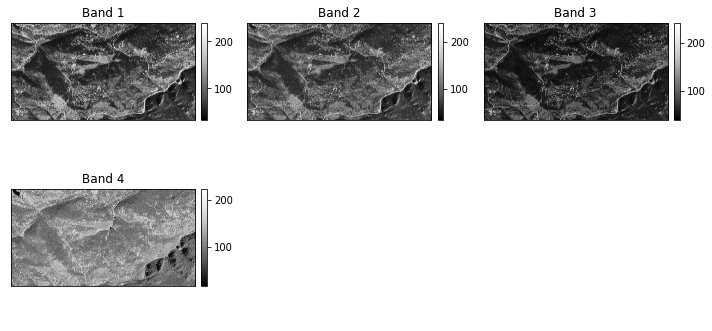

In [17]:
# Imagery data consist of multiple bands
# Plot each layer or band of the image separately
ep.plot_bands(naip_pre_fire, figsize=(10, 5))
plt.show()

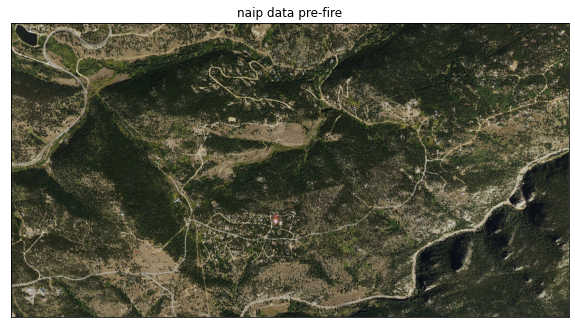

In [18]:
# Plot color image
ep.plot_rgb(naip_pre_fire,
            title="naip data pre-fire")
plt.show()

In [23]:
# Create a path for the data file - notice it is a .tif file
naip_post_fire_path = os.path.join("earthpy-downloads",
                                  "naip-before-after",
                                  "post-fire",
                                  "crop",
                                  "m_3910505_nw_13_1_20170902_crop.tif")

naip_post_fire_path

'earthpy-downloads/naip-before-after/post-fire/crop/m_3910505_nw_13_1_20170902_crop.tif'

In [ ]:
# Open the data using rasterio
with rio.open(naip_post_fire_path) as naip_postfire_src:
    naip_post_fire = naip_postfire_src.read()

naip_post_fire

In [ ]:
# Imagery data consist of multiple bands
# Plot each layer or band of the image separately
ep.plot_bands(naip_post_fire, figsize=(10, 5))
plt.show()

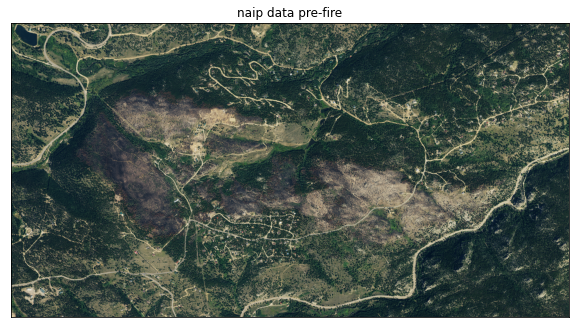

In [30]:
# Plot color image
ep.plot_rgb(naip_post_fire,
            title="naip data post-fire")
plt.show()